This file needs requires external data!

(Run on workstation)

In [8]:
import xarray as xr
import pyproj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime
import cmocean as cmo
import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy as np
import copy
import sys,os

sys.path.append('../src')
import utils as ut

In [2]:
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (15,7)

cmap = plt.get_cmap('nipy_spectral').copy()

vmins = {}
vmaxs = {}
vmins['sossheig'] = -2
vmaxs['sossheig'] = 1.2

vmins['zos'] = -2
vmaxs['zos'] = 1.2

vmins['vosaline'] = 33
vmaxs['vosaline'] = 36

vmins['sos'] = 33
vmaxs['sos'] = 36

vmins['votemper'] = -2
vmaxs['votemper'] = 25

vmins['tos'] = -2
vmaxs['tos'] = 25

vmins['vozocrtx'] = -.5
vmaxs['vozocrtx'] = .5

vmins['vomecrty'] = -.5
vmaxs['vomecrty'] = .5



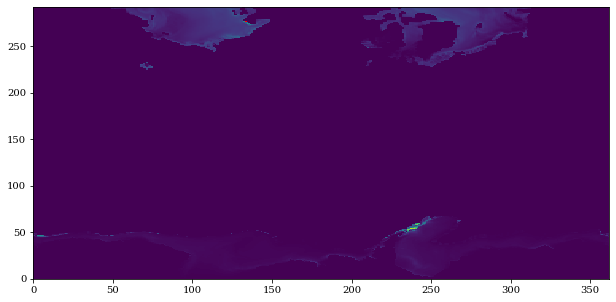

In [31]:
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (10,5)

run = 'half'

cmap = plt.get_cmap('viridis').copy()
cmap.set_bad('r')

fname = f'../data/ecefiles/errorfiles/output.abort_{run}.nc'
ds = xr.open_dataset(fname)
#ds = ds.isel(y=slice(0,105))
ds = ds.isel(deptht=0)
lat = ds['nav_lat']
lon = ds['nav_lon']
ssh = ds['sithic'].isel(time_counter=0)

fig = plt.figure()

ax = fig.add_subplot()
im = ax.pcolormesh(ssh,cmap=cmap)
plt.show()

ds.close()

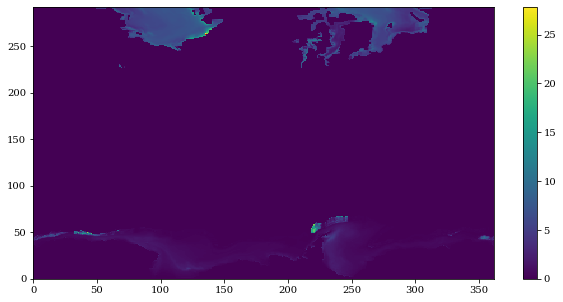

In [29]:
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (10,5)

run = 'totl'

cmap = plt.get_cmap('viridis').copy()
cmap.set_bad('r')

fname = f'../data/ecefiles/errorfiles/output.abort_{run}.nc'
ds = xr.open_dataset(fname)
#ds = ds.isel(y=slice(0,105))
ds = ds.isel(deptht=0)
lat = ds['nav_lat']
lon = ds['nav_lon']
ssh = ds['sithic'].isel(time_counter=0)
#print(ds.variables)
fig = plt.figure()

ax = fig.add_subplot()
im = ax.pcolormesh(ssh,cmap=cmap)
plt.colorbar(im)
plt.show()

ds.close()

In [ ]:
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (10,5)

run = 'totl'

cmap = plt.get_cmap('viridis').copy()
cmap.set_bad('r')

fname = f'../data/ecefiles/totl/totl_1m_19700101_19791231_grid_T.nc'
ds = xr.open_dataset(fname)
#ds = ds.isel(y=slice(0,105))
#ds = ds.isel(deptht=0)
lat = ds['nav_lat']
lon = ds['nav_lon']
ssh = ds['zos'].isel(time_counter=0)

fig = plt.figure()

ax = fig.add_subplot()
im = ax.pcolormesh(ssh,cmap=cmap)
plt.show()

ds.close()

['1975-08-13T00:45:00.000000000']


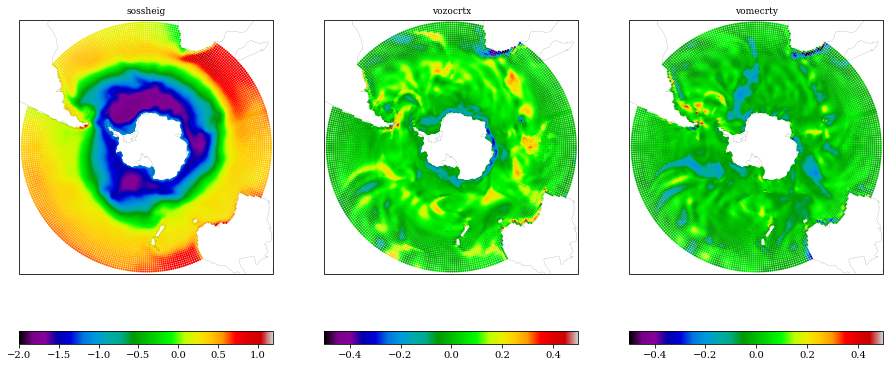

In [125]:
run = 'totl'

fname = f'../data/ecefiles/errorfiles/output.abort_{run}.nc'
ds = xr.open_dataset(fname)
ds = ds.isel(y=slice(0,105))
ds = ds.isel(deptht=0)
lat = ds['nav_lat']
lon = ds['nav_lon']
ssh = ds['sossheig']
print(ds.time_counter.values)

fig = plt.figure()

#varbs = ['sossheig','vosaline','votemper']
varbs = ['sossheig','vozocrtx','vomecrty']

for v,vv in enumerate(varbs):
    
    var = np.where(ssh==0,np.nan,ds[vv])

    ax = fig.add_subplot(1,len(varbs),v+1,projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -25], crs=ccrs.PlateCarree())
    im = ax.scatter(lon,lat,5*np.ones(lon.shape),c=var,transform=ccrs.PlateCarree(),cmap=cmap,lw=0,vmin=vmins[vv],vmax=vmaxs[vv])
    ax.coastlines(lw=.1)
    ax.set_title(vv)
    plt.colorbar(im,orientation='horizontal')
ds.close()

1979-09-16T00:00:00.000000000


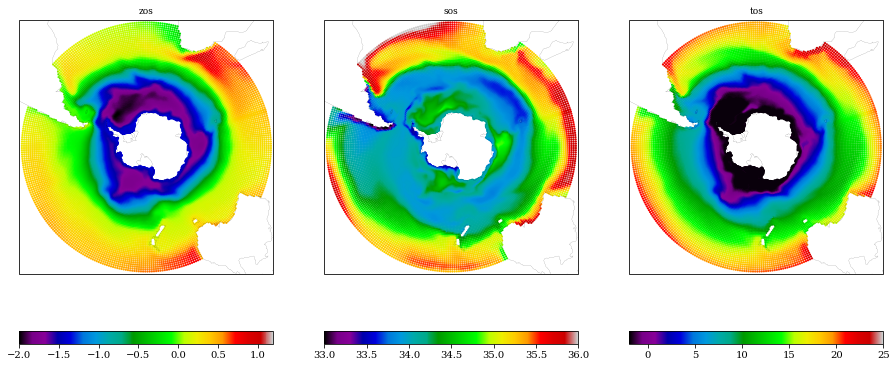

In [116]:
fname = f'../data/ecefiles/n011/n011_1m_19700101_19791231_grid_T.nc'
ds = xr.open_dataset(fname)
ds = ds.isel(y=slice(0,105))
#ds = ds.isel(deptht=0)
ds = ds.isel(time_counter=-4)

lat = ds['nav_lat']
lon = ds['nav_lon']
ssh = ds['zos']
print(ds.time_counter.values)
fig = plt.figure()

for v,vv in enumerate(['zos','sos','tos']):
    var = np.where(ssh==0,np.nan,ds[vv])

    ax = fig.add_subplot(1,3,v+1,projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -25], crs=ccrs.PlateCarree())
    im = ax.scatter(lon,lat,5*np.ones(lon.shape),c=var,transform=ccrs.PlateCarree(),cmap=cmap,lw=0,vmin=vmins[v],vmax=vmaxs[v])
    ax.coastlines(lw=.1)
    ax.set_title(vv)
    plt.colorbar(im,orientation='horizontal')
ds.close()

In [ ]:
run = 'n011'
fnames0 = sorted(glob.glob(f'../data/ecefiles/{run}/{run}*T.nc'))[38:]

run = 'totl'
fnames1 = sorted(glob.glob(f'../data/ecefiles/{run}/{run}*T.nc'))

titles = ['ctrl','totl','totl-ctrl']

cmaps = ['nipy_spectral','nipy_spectral','cmo.balance']
vmins = [25,25,-2]
vmaxs = [36,36,2]

nyears = 0
for fname in fnames1:
    ds = xr.open_dataset(fname)
    nyears += int(np.floor(len(ds.time_counter)/12))
    ds.close()
print(nyears, 'years')

t0 = 0
for f,fname in enumerate(fnames1):
    ds1 = xr.open_dataset(fname)
    #ds1 = ds1.isel(y=slice(0,105))
    lat = ds1['nav_lat']
    lon = ds1['nav_lon']
    ds0 = xr.open_dataset(fnames0[f])
    #ds0 = ds0.isel(y=slice(0,105))
    for t,tt in enumerate(ds1.time_counter):
        ssh0 = ds0['sos'].isel(time_counter=t)
        ssh1 = ds1['sos'].isel(time_counter=t)
        fig = plt.figure()
        for v,var in enumerate([ssh0,ssh1,ssh1-ssh0]):
            #ax = fig.add_subplot(1,3,v+1,projection=ccrs.SouthPolarStereo())
            #ax.set_extent([-180, 180, -90, -25], crs=ccrs.PlateCarree())
            #im = ax.scatter(lon,lat,5*np.ones(lon.shape),c=np.where(var==0,np.nan,var),transform=ccrs.PlateCarree(),cmap=cmaps[v],lw=0,vmin=vmins[v],vmax=vmaxs[v])
            ax = fig.add_subplot(1,3,v+1)
            im = ax.pcolormesh(np.where(var==0,np.nan,var),cmap=cmaps[v],lw=0,vmin=vmins[v],vmax=vmaxs[v])

            
            #ax.coastlines(lw=.1)
            ax.set_title(titles[v])
            plt.colorbar(im,orientation='horizontal')
        fig.suptitle(str(tt.values)[:7])
        #plt.savefig(f'../videos/sos_monthly_{run}_{t0:03.0f}.png',dpi=150)
        t0 += 1
        plt.show()
        
    ds0.close()
    ds1.close()

In [10]:
#Arctic sea ice thickness and salinity

mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.hspace'] = .1

mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (7,7)


run = 'n011'
fnames0 = sorted(glob.glob(f'../data/ecefiles/{run}/{run}*icemod.nc'))[38:]
gnames0 = sorted(glob.glob(f'../data/ecefiles/{run}/{run}*grid_T.nc'))[38:]

run = 'half'
fnames1 = sorted(glob.glob(f'../data/ecefiles/{run}/{run}*icemod.nc'))
gnames1 = sorted(glob.glob(f'../data/ecefiles/{run}/{run}*grid_T.nc'))

titles = ['ctrl','totl','totl-ctrl']

cmaps = ['nipy_spectral','nipy_spectral','cmo.balance']
vmins = [0,0,-5]
vmaxs = [15,15,5]

wmins = [20,20,-5]
wmaxs = [35,35,5]

nyears = 0
for fname in fnames1:
    ds = xr.open_dataset(fname)
    nyears += int(np.floor(len(ds.time_counter)/12))
    ds.close()
print(nyears, 'years')

prefix = f'Arctic_monthly_{run}'

t0 = 0
for f,fname in enumerate(fnames1):
    ds1 = xr.open_dataset(fname)
    ds1 = ds1.isel(y_grid_T=slice(200,-1))
    lat = ds1['nav_lat_grid_T']
    lon = ds1['nav_lon_grid_T']
    ds0 = xr.open_dataset(fnames0[f])
    ds0 = ds0.isel(y_grid_T=slice(200,-1))
    dds1 = xr.open_dataset(gnames1[f])
    llat = dds1['nav_lat']
    llon = dds1['nav_lon']    
    dds1 = dds1.isel(y=slice(200,-1))
    dds0 = xr.open_dataset(gnames0[f])  
    dds0 = dds0.isel(y=slice(200,-1))    
    
    for t,tt in enumerate(ds1.time_counter):
        sit0 = ds0['sithic'].isel(time_counter=t)
        sit1 = ds1['sithic'].isel(time_counter=t)
        sos0 = dds0['sos'].isel(time_counter=t)
        sos1 = dds1['sos'].isel(time_counter=t)        
        fig = plt.figure()
        for v,var in enumerate([sit0,sit1,sit1-sit0]):
            ax = fig.add_subplot(2,3,v+1,projection=ccrs.NorthPolarStereo())
            ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
            im = ax.scatter(lon,lat,3,c=np.where(var==0,np.nan,var),transform=ccrs.PlateCarree(),cmap=cmaps[v],lw=0,vmin=vmins[v],vmax=vmaxs[v])
            
            ax.coastlines(lw=.1)
            ax.set_title(titles[v])
            plt.colorbar(im,orientation='horizontal')
        for v,var in enumerate([sos0,sos1,sos1-sos0]):
            ax = fig.add_subplot(2,3,v+1+3,projection=ccrs.NorthPolarStereo())
            ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
            im = ax.scatter(lon,lat,3,c=np.where(var==0,np.nan,var),transform=ccrs.PlateCarree(),cmap=cmaps[v],lw=0,vmin=wmins[v],vmax=wmaxs[v])
            
            ax.coastlines(lw=.1)
            plt.colorbar(im,orientation='horizontal')         
                
        fig.suptitle(str(tt.values)[:7])
        savename = f'../videos/{prefix}_{t0:03.0f}.png'
        plt.savefig(savename,dpi=150)
        print('Saved',t0,'of approx',12*nyears+6,'months',end='\r')
        t0 += 1
        plt.close()
        
    ds0.close()
    ds1.close()
    dds0.close()
    dds1.close()
os.system(f'ffmpeg -y -r 4 -f image2 -s 1920x1080 -i ../videos/{prefix}_%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p ../videos/{prefix}.mp4')
os.system(f'rm -r ../videos/{prefix}*.png')

15 years


TypeError: 'module' object is not callable